<a href="https://colab.research.google.com/github/senchiao/HRRR_plots/blob/main/stefan_boltzman_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stefan-Boltzman

Calculate the definite integral of $\int_0^5 a x^3 dx$ for a given value of a and compare it
with the analytic answer: $y=\frac{a}{4} 5^4$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xvec=np.arange(0,5,0.01) #vector from 0 to 5 in 0.01 step sizes

In [3]:
xvec[:10] #print the first 10 values

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

Now make a vector of intervals $dx$ using the diff function

In [4]:
dx=np.diff(xvec) #note that dx is one item shorter than xvec

integration is just the sum over rectangles of width $dx$
and height $ax^3$

In [6]:
a=5
integral=np.sum(a*xvec[0:-1]**3.*dx)
analytic=a/4.*5.**4.
print("analytic: %8.4f, approximate: %8.4f" % (analytic,integral))

analytic: 781.2500, approximate: 771.9156


Apply this to the Planck function (Stull Chapter 2, Equation 2.13, p. 36):

$E_\lambda^* = \frac{c1}{\lambda^5 \left ( exp(c_2/(\lambda T)) - 1 \right )}$

or [Planck's law](http://en.wikipedia.org/wiki/Planck's_law)

$E_\lambda* =\pi \frac{2 hc^2}{\lambda^5}\frac{1}{ e^{\frac{hc}{\lambda kT}}-1}$

where

$h$=Planck's constant ($6.63 \times 10^{-34}$ Joule seconds})

$c$= Speed of light in a vacuum ($3.00 \times 10^{8}\ \mathrm{meters/second}$)

$k_b$ =Boltzman's  constant ($1.38 \times 10^{-23}\ \mathrm{Joules/Kelvin}$)

(note that $E_\lambda*$ is the blackbody *flux*, or *irradiance*, with units of $W/m^2 /\mu m$)
Wikipedia (and Wallace and Hobbs) give the blackbody *radiance* which differs by
by a factor of $\pi$ and has units of $W/m^2/\mu m /sr$.  We will talk a lot about this
in the next few weeks, don't worry about it for now.


In [7]:
c=2.99792458e+08  #m/s -- speed of light in vacumn
h=6.62606876e-34  #J s  -- Planck's constant
kb=1.3806503e-23  # J/K  -- Boltzman's constant

def planckwavelen(wavel,Temp):
    """input wavelength in microns and Temp in K, output
    bbr in W/m^2/micron
    """
    wavel=wavel*1.e-6  #convert to meters
    c1=2.*h*c**2.
    c2=h*c/kb
    Elambda=1.e-6*np.pi*c1/(wavel**5.*(np.exp(c2/(wavel*Temp)) -1))
    return Elambda


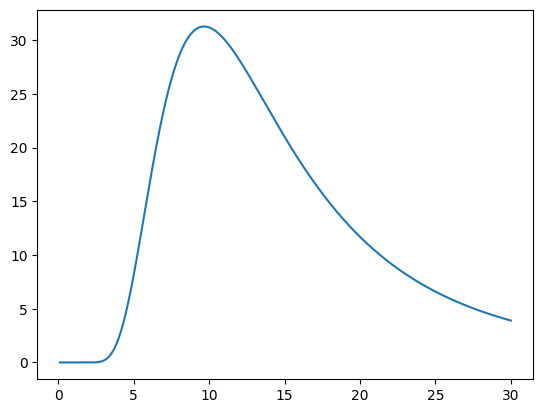

In [8]:
the_wavelengths=np.linspace(0.1,30,5000) #microns
the_temp=300 #K
flux=planckwavelen(the_wavelengths,the_temp)
plt.plot(the_wavelengths,flux)

Assignment:  Use sum and diff along with the function planckwavelen to
integrate the Planck function over wavelength and verify the
Stefan-Boltzman equation on Stull chapter 2 p. 37:

$E^* = \int_0^\infty E_\lambda^* d\lambda = \sigma T^4$

where $\sigma=5.67 \times 10^-8$ $W/m^2/K^{4}$

#### Answer (I extended the maximum wavelength and the number of points until I got agreement to a percent or so -- but it wasn't necessary for the spirit of this exercise).

In [10]:
the_wavelengths=np.linspace(0.1,200,50000) #microns
the_temp=300 #K
flux=planckwavelen(the_wavelengths,the_temp)
the_int=np.sum(flux[:-1]*np.diff(the_wavelengths))
sigma=5.67e-8  #W/m^2/K^4
stefan=sigma*the_temp**4.
print("approx integral: %9.4f, exact stefan boltzman %9.4f" % (the_int,stefan))

approx integral:  459.0056, exact stefan boltzman  459.2700
